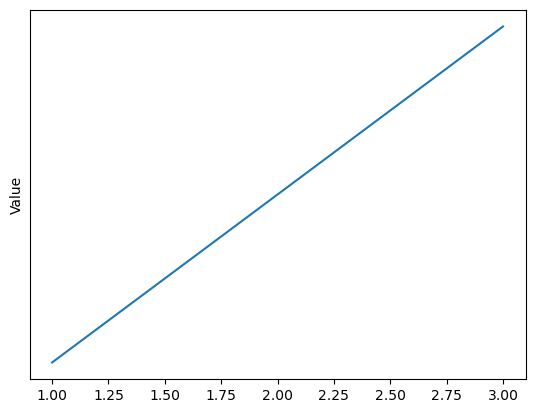

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
plt.plot([1, 2, 3], [0.1, 0.3, 0.5])
plt.ylabel('Value')

# Get the YAxis instance for the current plot
y_axis = plt.gca().get_yaxis().set_ticks([])
# plt.gca().get_yaxis().set_ticks([])
# Format the y-axis tick labels as percentages
# y_axis.set_major_formatter(plt.PercentFormatter(xmax=1, decimals=0))

plt.show()

In [2]:
iris = load_iris(as_frame=True)

In [3]:
Xi= iris.data[['petal length (cm)','petal width (cm)']].values
y= iris.target[(iris.target==0)|(iris.target==1)]
X = Xi[(iris.target==0)|(iris.target==1)]

# X1 = np.concatenate(np.array([[3.0,0.75]]) ,axis=0)
# y1 = np.concatenate(np.array([0]),axis=0)

x0 = np.linspace(0,5,100)
pred_1 = 0.1*x0 +0.5
pred_2 =1.5*x0 -4
pred_3 =2.5*x0 -10

svc =SVC(kernel='linear',C=100)
svc.fit(X,y)

def hard_margin(svm,axis):
    w= svc.coef_[0]
    b=svc.intercept_
    x0 = np.linspace(axis[0],axis[1],100)
    decision_boundary= (-w[0]*x0 - b)/w[1]
    svs =svc.support_vectors_
    
    margin =1/w[1]
    gutter_up = decision_boundary + margin 
    gutter_down = decision_boundary - margin 
    
    plt.plot(x0,decision_boundary,'k-')
    plt.plot(x0,gutter_up,'k--')
    plt.plot(x0,gutter_down,'k--',zorder=-2)
    
    plt.scatter(svs[:,0],svs[:,1],s=180, 
                zorder=-1)

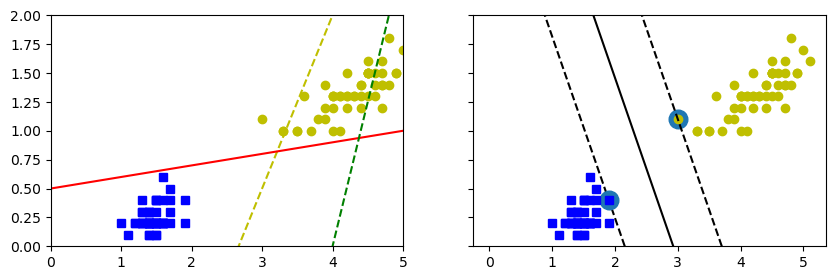

In [4]:
fig,axs = plt.subplots(ncols=2,figsize=(10,3),sharey=True)
plt.sca(axs[0])
plt.plot(X[y==0,0],X[y==0,1],'bs')
plt.plot(X[y==1,0],X[y==1,1],'yo')
plt.plot(x0,pred_2,'y--')
plt.plot(x0,pred_1,'r-')
plt.plot(x0,pred_3,'g--')
plt.axis([0,5,0,2])

plt.sca(axs[1])
plt.plot(X[y==0,0],X[y==0,1],'bs')
plt.plot(X[y==1,0],X[y==1,1],'yo')
hard_margin(svc,[0,5])

plt.show()

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [6]:
LinearSVC?

In [7]:
X,y = make_moons(n_samples=100,noise=0.15,random_state=42)

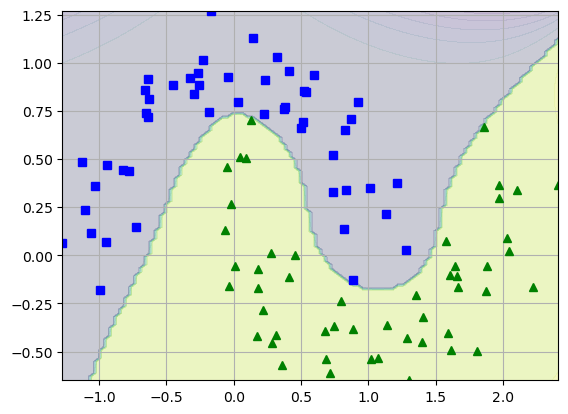

In [8]:
poly_svc = make_pipeline(PolynomialFeatures(degree=10),
                         StandardScaler(),
                         LinearSVC(C=10,max_iter=10000,random_state=42))

poly_svc.fit(X,y)

x0,x1 = np.meshgrid(np.linspace(np.min(X[:,0]),np.max(X[:,0]),100),
                    np.linspace(np.min(X[:,1]),np.max(X[:,1]),100))
x_new = np.c_[x0.ravel(),x1.ravel()]
y_decision = poly_svc.decision_function(x_new).reshape(x0.shape)
y_predict = poly_svc.predict(x_new).reshape(x0.shape)

plt.plot(X[y==0,0],X[y==0,1],'bs')
plt.plot(X[y==1,0],X[y==1,1],'g^')

plt.contourf(x0,x1,y_decision,alpha=0.1)
plt.contourf(x0,x1,y_predict,alpha=0.2)
plt.grid(True)
plt.show()

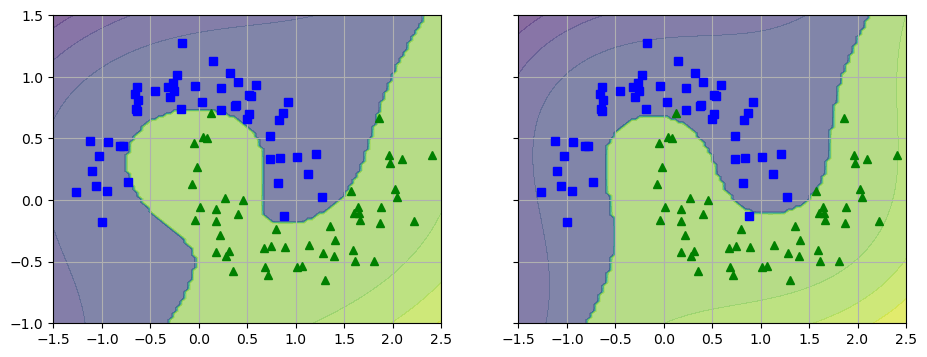

In [9]:
poly_svm3 = make_pipeline(StandardScaler(),
                         SVC(kernel='poly',C=5,degree=3,coef0=1))

poly_svm10 = make_pipeline(StandardScaler(),
                         SVC(kernel='poly',C=5,degree=10,coef0=100))

poly_svm10.fit(X,y)
poly_svm3.fit(X,y)
def plot_prediction(svm,axes):
    x0,x1 = np.meshgrid(np.linspace(axes[0],axes[1],100),
                    np.linspace(axes[2],axes[3],100))
    x_new = np.c_[x0.ravel(),x1.ravel()]
    y_decision = svm.decision_function(x_new).reshape(x0.shape)
    y_predict = svm.predict(x_new).reshape(x0.shape)

    plt.plot(X[y==0,0],X[y==0,1],'bs')
    plt.plot(X[y==1,0],X[y==1,1],'g^')

    plt.contourf(x0,x1,y_decision,alpha=0.4)
    plt.contourf(x0,x1,y_predict,alpha=0.4)
    plt.grid(True)
    plt.axis([-1.5,2.5,-1.0,1.5])
    
    
fig,ax = plt.subplots(ncols=2,sharey=True,figsize=(11,4))
plt.sca(ax[0])
plot_prediction(poly_svm10,[-1.5,2.5,-1.0,1.5])


plt.sca(ax[1])
plot_prediction(poly_svm3,[-1.5,2.5,-1.0,1.5])
plt.show()

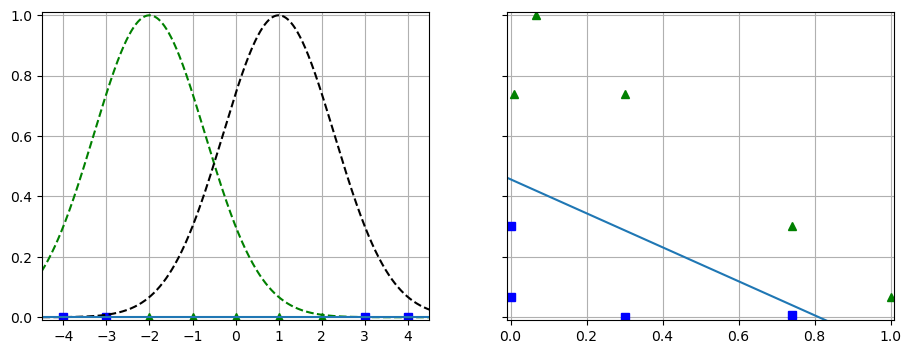

In [10]:
from sklearn.metrics.pairwise import rbf_kernel
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

fig,ax = plt.subplots(ncols=2,sharey=True,figsize=(11,4))

plt.sca(ax[0])
plt.plot(X1D[y==0],np.zeros(4),'bs')
plt.plot(X1D[y==1],np.zeros(5),'g^')
# plt.axis([])
gau_x = np.linspace(-5,5,1000).reshape(-1,1)

svc_kernel = SVC(kernel='rbf',gamma=0.3)
svc_kernel.fit(X1D,y)

rbf1 = rbf_kernel(gau_x, [[-2]], gamma=0.3)
rbf2 = rbf_kernel(gau_x, [[1]], gamma=0.3)

y_pred = svc_kernel.predict(X1D)
plt.plot(gau_x,rbf1,'g--')
plt.plot(gau_x,rbf2,'k--')

plt.grid(True)
plt.axis([-4.5,4.5,-0.01,1.01])
plt.axhline(0)


XK = np.c_[rbf_kernel(X1D, [[-2]], 0.3), rbf_kernel(X1D, [[1]], 0.3)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

s = LinearSVC()
s.fit(XK,yk)

sk = np.linspace(-0.02,1.02,100)
skk = (-s.coef_[0,0]*sk -s.intercept_)/s.coef_[0,1]
plt.sca(ax[1])
plt.plot(XK[yk==0,0],XK[yk==0,1],'bs')
plt.plot(XK[yk==1,0],XK[yk==1,1],'g^')
plt.grid(True)
plt.axis([-0.01,1.01,-0.01,1.01])
plt.plot(sk,skk)
plt.show()

In [11]:
s.coef_[0,0]

0.8443899690555332

In [12]:
Xi= iris.data[['petal length (cm)','petal width (cm)']].values
y= iris.target[(iris.target==0)|(iris.target==1)]
X = Xi[(iris.target==0)|(iris.target==1)]
standard = StandardScaler()
Xx = standard.fit_transform(X)

In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline

linsvc = LinearSVC(C=1,random_state=42)
linsvc.fit(X,y)

kersvc = SVC(kernel='linear',C=1,random_state=42)
kersvc.fit(X,y)

sgdreg = SGDClassifier(penalty='l2',learning_rate='adaptive',random_state=42,alpha=0.01,eta0=0.001)
sgdreg.fit(X,y)

print(linsvc.coef_,linsvc.intercept_)
print(" ")
print(kersvc.coef_,kersvc.intercept_)
print(" ")
print(sgdreg.coef_,sgdreg.intercept_)

# linsvc = LinearSVC(loss='hinge',C=100,random_state=42)
# linsvc.fit(Xx,y)

# kersvc = SVC(kernel='linear',C=100,random_state=42)
# kersvc.fit(Xx,y)

# sgdreg = SGDClassifier(penalty='l2',learning_rate='constant',random_state=42,alpha=0.01,eta0=0.1)
# sgdreg.fit(Xx,y)

# print(linsvc.coef_,linsvc.intercept_)
# print(" ")
# print(kersvc.coef_,kersvc.intercept_)
# print(" ")
# print(sgdreg.coef_,sgdreg.intercept_)

[[0.61571106 0.81021718]] [-2.12826314]
 
[[1.1 0.7]] [-3.27999997]
 
[[0.57087705 0.84161287]] [-2.0950736]


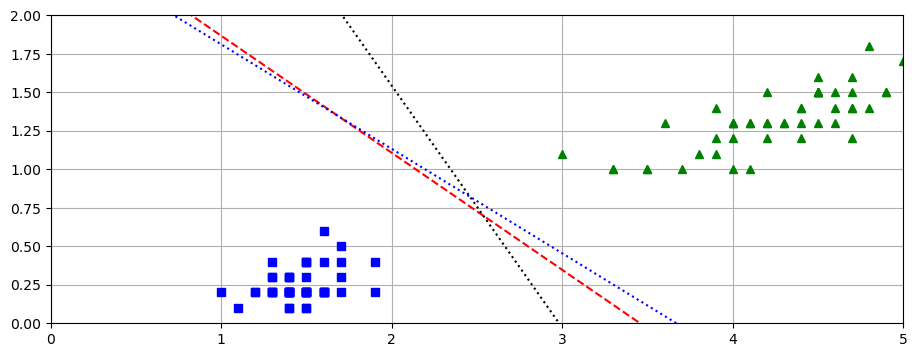

In [14]:
def simlar_svc(svc,linetype):
    w = svc.coef_[0]
    b = svc.intercept_
    
    x0 = np.linspace(0,5,200)
    
    decision_boundary = (-w[0]*x0 - b)/w[1]
    margin = 1/w[1]
    
    plt.plot(x0,decision_boundary,linetype)
    
    
fig= plt.figure(figsize=(11,4)) 
plt.plot(X[y==0,0],X[y==0,1],'bs')
plt.plot(X[y==1,0],X[y==1,1],'g^')
simlar_svc(linsvc,'r--')

simlar_svc(kersvc,'k:')

simlar_svc(sgdreg,'b:')
plt.axis([0,5,0,2])
plt.grid(True)
plt.show()

In [15]:
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)
X,y = wine.data,wine.target


In [16]:
from sklearn.model_selection import train_test_split
train_test_split?
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [700]:
sgd = SGDClassifier?

In [ ]:
sgd = SGDClassifier

In [701]:
sgd = SGDClassifier

In [702]:
sgd = SGDClassifier

In [17]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import learning_curve
learning_curve?

In [704]:
SVC?

In [18]:
sgd = make_pipeline(StandardScaler(),OneVsRestClassifier(SGDClassifier(random_state=42)))
sgd.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('onevsrestclassifier',
                 OneVsRestClassifier(estimator=SGDClassifier(random_state=42)))])

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, X_train, y_train, cv=3, scoring="accuracy").mean()

0.9545454545454545

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(sgd.predict(X_train),y_train)

1.0

In [22]:
from sklearn.pipeline import Pipeline,make_pipeline
svm = Pipeline([('scaler',StandardScaler()),('svc',OneVsRestClassifier(SVC(C=10,random_state=42,max_iter=1000000)))])
svm.fit(X_train,y_train)

svc = Pipeline([('scaler',StandardScaler()),('svc',SVC(C=10,random_state=42,max_iter=1000000))])
svc.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=10, max_iter=1000000, random_state=42))])

In [23]:
cross_val_score(svm, X_train, y_train, cv=5, scoring="accuracy").mean()

0.9698005698005698

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon,randint,uniform,loguniform
params_distr = [{'svc__estimator__C':uniform(1,10),
               'svc__estimator__gamma':['scale','auto'],
               'svc__estimator__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']},
               {'svc__estimator__C':uniform(1,10),
               'svc__estimator__gamma':loguniform(0.001, 0.1),
               'svc__estimator__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}]

params_distrib = {
    "svc__estimator__gamma": loguniform(0.001, 0.1),
    "svc__estimator__C": uniform(1, 10)}
    
rnd_search = RandomizedSearchCV(svm,param_distributions=params_distr,n_iter=100,cv=5,random_state=42)
rnd_search.fit(X_train,y_train)

/Users/adeoyedipo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/adeoyedipo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adeoyedipo/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/adeoyedipo/opt/anaconda3/lib/python3.8/site-packages/sklearn/multiclass.py", line 330, in fi

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc',
                                              OneVsRestClassifier(estimator=SVC(C=10,
                                                                                max_iter=1000000,
                                                                                random_state=42)))]),
                   n_iter=100,
                   param_distributions=[{'svc__estimator__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdd05842190>,
                                         'svc__estimator__gamma': ['scale',
                                                                   'auto'],
                                         'svc__estimator__kernel': ['linear',
                                                                    'poly',
                                                                    'rbf',
                                                                    'sigmoid',
                                                                    'precomputed']},
                                        {'svc__estimator__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdd057fdb20>,
                                         'svc__estimator__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdd05842370>,
                                         'svc__estimator__kernel': ['linear',
                                                                    'poly',
                                                                    'rbf',
                                                                    'sigmoid',
                                                                    'precomputed']}],
                   random_state=42)

In [25]:
rnd_search.best_score_,rnd_search.best_params_

(0.9923076923076923,
 {'svc__estimator__C': 9.870864242651173,
  'svc__estimator__gamma': 0.036287002255540664,
  'svc__estimator__kernel': 'sigmoid'})

In [26]:
rnd_search.score(X_test,y_test)

0.9777777777777777

In [119]:
from sklearn.datasets import fetch_california_housing


In [120]:
cali = fetch_california_housing()
X,y = cali.data,cali.target

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [122]:
from sklearn.svm import SVR
housing = Pipeline([('scaler',StandardScaler()),('svr',SVR())])
housing.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR())])

In [123]:
from sklearn.model_selection import cross_val_predict
-cross_val_score(housing,X_train[:2000],y_train[:2000],scoring='neg_root_mean_squared_error',cv=3)

array([0.57468056, 0.58080946, 0.57191242])

In [124]:
from sklearn.metrics import mean_squared_error
mean_squared_error(housing.predict(X_train),y_train,squared=False)

0.5797673265358964

In [70]:
SVR?

In [128]:
from scipy.stats import expon,randint,uniform,loguniform,randint


In [ ]:
rnd_search.best_score_

In [ ]:
rnd_search.best_params_

In [ ]:
rnd_search.score(X_test,y_test)

In [125]:
from scipy.stats import expon,randint,uniform,loguniform,randint
params_distrib = {
    "svr__gamma": loguniform(0.001, 0.1),
    "svr__C": uniform(1, 10)}
    
rnd_search = RandomizedSearchCV(housing,param_distributions=params_distrib,n_iter=100,cv=3,
                                random_state=42)
rnd_search.fit(X_train[:2000],y_train[:2000])
rnd_search.best_score_
rnd_search.best_params_

{'svr__C': 4.63629602379294, 'svr__gamma': 0.08781408196485974}

In [126]:
-cross_val_score(rnd_search.best_estimator_,X_train,y_train,scoring='neg_root_mean_squared_error',cv=5)

array([0.58835648, 0.57468589, 0.58085278, 0.57109886, 0.59853029])

In [127]:
mean_squared_error(rnd_search.best_estimator_.predict(X_test),y_test,squared=False)

0.5854732265172222

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=100,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdceb73f220>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdce980a8e0>},
                   random_state=42)

array([0.40874302, 0.40858073, 0.38945624, 0.48431257, 0.44180503])